# Original plan was to use the FGVCx competition dataset

https://github.com/visipedia/fgvcx_fungi_comp

Though there are actually very few images, and many of the mushroom classes are not found in the UK

I therefore created an image scraper to pull hundreds of images from various search engines, using search terms extracted from a UK mushroom identification database

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import tarfile
import glob
import os
import time

## Initial Download of the competition dataset

In [2]:
directory = 'C://Users//danie//Documents//DW//Shrooms//shroom_comp//'


data = ["train_val_annotations", "test_information", "fungi_test", "fungi_train_val"]

errors = 'fungi_train_val\\images\\12665_Cortinarius_uliginosus f. uliginosus \\JM2009PIC22142605.JPG'

In [3]:
tarsefiles = False

if tarsefiles is True:
    for idx, dataset in enumerate(data):

        data_dir = directory + dataset

        print(data_dir)

        with tarfile.open(data_dir + '.tgz', 'r:gz') as opened_targz_file:
            try:
                opened_targz_file.extractall(data_dir)
            except FileNotFoundError as error:
                errors.append(error)
                print(error)

### Images

In [ ]:
image_directory = directory + data[-1] + '//images//'

shroom_folder_size = []
shroom_folder = None

for dirpath, dirnames, filenames in os.walk(image_directory):
    
    if shroom_folder is None:
        shroom_folder = dirnames
    
    shroom_folder_size.append(len(filenames))

In [5]:
df_images = pd.Series(dict(zip(shroom_folder, shroom_folder_size))).sort_values(ascending=False)
df_images.head()

14435_Gymnopus_dryophilus          342
14069_Fuligo_leviderma             329
14963_Hymenoscyphus_fructigenus    219
14454_Gyromitra_esculenta          197
47767_Schizophyllum_amplum         196
dtype: int64

### The majority of classes have fewer than 100 images, very little chance of good performance

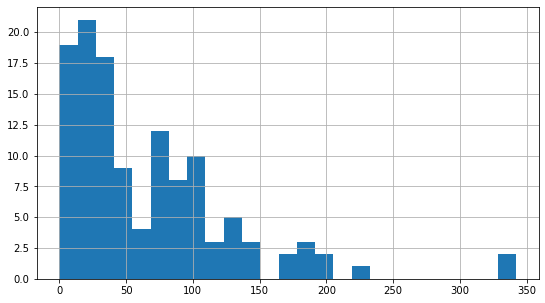

In [6]:
plt.figure(figsize=(9,5))
_ = df_images.hist(bins=25)

Mushroom no:   0%|          | 0/142 [00:00<?, ?it/s]

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/1/12/Russula_fellea_G3.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB2A01F40>
Failed to access image url https://www.discoverlife.org/IM/I_MWS/1293/320/Russula_fellea,I_MWS129385.jpg - HTTPSConnectionPool(host='www.discoverlife.org', port=443): Max retries exceeded with url: /IM/I_MWS/1293/320/Russula_fellea,I_MWS129385.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1125)')))
Could not save https://www.discoverlife.org/IM/I_MWS/1293/320/Russula_fellea,I_MWS129385.jpg - local variable 'image_content' referenced before assignment
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Russula_caerulea.jpg/440px-Russula_caerulea.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB2A91D10>
Could not save https://upload.wikimedia.org/wikipedia/commons/0/05/Russ.fell.

Extracting 200 links from 344 Duckduckgo results:   0%|          | 0/344 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1294%2F320%2FRussula_fellea%2CI_MWS129428.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB0ADCC70>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1294%2F320%2FRussula_fellea%2CI_MWS129433.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB2ADD4F0>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1294%2F320%2FRussula_fellea%2CI_MWS129427.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB0ADCC70>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1294%2F320%2FRussula_fellea%2CI_MWS129429.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFA8FF90>
Could not save https://external-content.duck

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Russula_emetica_in_Poland.jpg/1200px-Russula_emetica_in_Poland.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB2ADD860>
Could not save https://upload.wikimedia.org/wikipedia/commons/c/c1/Russula_emetica_%2829778155110%29.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB0B5C4F0>
Failed to access image url https://www.discoverlife.org/IM/I_LJM/0317/320/Russula_emetica,I_LJM31709.jpg - HTTPSConnectionPool(host='www.discoverlife.org', port=443): Max retries exceeded with url: /IM/I_LJM/0317/320/Russula_emetica,I_LJM31709.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1125)')))
Could not save https://www.discoverlife.org/IM/I_LJM/0317/320/Russula_emetica,I_LJM31709.jpg - local variable 'image_content' referenced before assignment
Could not save https://upload.wikimedia.or

Extracting 200 links from 265 Duckduckgo results:   0%|          | 0/265 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fstatic.panoramio.com%2Fphotos%2Flarge%2F27435555.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB2AD1AE0>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2Fmp%2F20p%3Fimg%3DI_MWS123507%26res%3Dmx&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB2AAC220>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1235%2F320%2FRussula_emetica%2CI_MWS123503.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB2AD1AE0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1235%2F320%2FRussula_emetica%2CI_MWS123509.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB2AACDB0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwildmushroomh

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/2010-09-29_Russula_cyanoxantha_cropped.jpg/1200px-2010-09-29_Russula_cyanoxantha_cropped.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB1660720>
Could not save https://upload.wikimedia.org/wikipedia/commons/5/5e/Russula_cyanoxantha_G1.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB2ADD860>
Could not save https://upload.wikimedia.org/wikipedia/commons/b/b1/Russulamexicana.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB15F8B80>
Could not save https://upload.wikimedia.org/wikipedia/commons/5/56/Frauen-T%C3%A4ubling_Russula_cyanoxantha.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB15F8B80>
Could not save https://upload.wikimedia.org/wikipedia/commons/f/f2/Russula_cyanoxantha.JPG - cannot identify image file <_io.BytesIO object at 0x000001BEAFA8FF90>


Extracting 200 links from 265 Duckduckgo results:   0%|          | 0/265 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1018%2F320%2FRussula_cyanoxantha%2CI_MWS101875.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFAA4310>


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to cl

Saving Images:   0%|          | 0/201 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/b/b6/Russula_claroflava_trio.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB19090>
Could not save https://upload.wikimedia.org/wikipedia/commons/1/1f/Russula_ochroleuca_ch%C3%A2taigne.JPG - cannot identify image file <_io.BytesIO object at 0x000001BEAFB19090>
Could not save https://upload.wikimedia.org/wikipedia/commons/3/31/Gelber_Graustiel-T%C3%A4ubling2.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB2ADDA40>
Could not save https://upload.wikimedia.org/wikipedia/commons/9/95/2010-08-11_Russula_claroflava_Grove._ss._Melz%2C_%26_Zv.%2C_J._Schff_98988.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB64B30>


Extracting 200 links from 276 Duckduckgo results:   0%|          | 0/276 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1152%2F320%2FRussula_claroflava%2CI_MWS115253.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB2ADD130>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1152%2F320%2FRussula_claroflava%2CI_MWS115278.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFB25950>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F0160%2F320%2FRussula_claroflava%2CI_MWS16061.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFAEC090>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F0160%2F320%2FRussula_claroflava%2CI_MWS16030.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFB258B0>
Could not save https://externa

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/f/f9/Russula_atropurpurea_BS11.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB64A90>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/c/c6/Zwartpurperen_russula_%28Russula_atropurpurea%29_%28d.j.b.%29_01.jpg/1200px-Zwartpurperen_russula_%28Russula_atropurpurea%29_%28d.j.b.%29_01.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB19770>
Failed to access image url  - No connection adapters were found for ''
Could not save  - local variable 'image_content' referenced before assignment
Could not save https://www.geoffdann.co.uk/wp-content/uploads/2013/03/b2.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB7C900>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Two_views_of_a_mature_Purple_Brittlegill_on_Kaien_Island.png/440px-Two_views_of_a_mature_Purple_Brittlegill_on_Kaien_Island.png - cannot identify image file <_io.BytesIO 
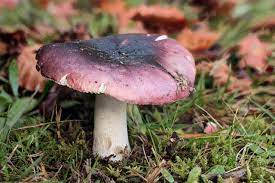
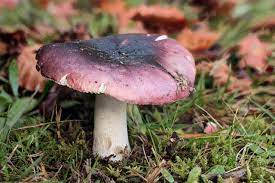
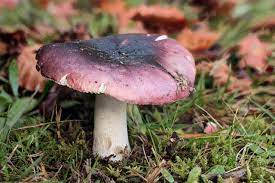

Extracting 200 links from 269 Duckduckgo results:   0%|          | 0/269 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fi.redd.it%2Fa638ubwzq2951.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFB64900>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1294%2F320%2FRussula_atropurpurea%2CI_MWS129488.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFB640E0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2FBIG%2F136244.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFB25C20>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2F136240.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFB25C20>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1294%2F320%2FRussula_atropurpurea%2CI_MWS129491.jpg&f=1&n

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/1/19/Rhodotus_palmatus_41540150.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB19A40>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Rhodotus_palmatus_46170_crop.jpg/220px-Rhodotus_palmatus_46170_crop.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB64EF0>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Rhodotus_palmatus2.jpg/1200px-Rhodotus_palmatus2.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB19770>
Could not save https://upload.wikimedia.org/wikipedia/commons/b/bc/Rhodotus_palmatus_41540148.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB2FF7180>
Could not save https://upload.wikimedia.org/wikipedia/commons/b/bf/Rhodotus_palmatus_40169722.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB2FF7180>
Could not save https://learn.freshcap.com/wp-content/uploads/2019/07/rhodot

Extracting 200 links from 261 Duckduckgo results:   0%|          | 0/261 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F0301%2F640%2FRhodotus_palmatus%2CI_MWS30198.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFBC09A0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Flive.staticflickr.com%2F6071%2F6137346120_81caffc7a7_b.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEAFAEC090>


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to cl

Saving Images: : 0it [00:00, ?it/s]

Failed to save images: 'NoneType' object is not iterable


Extracting 200 links from 261 Duckduckgo results:   0%|          | 0/261 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.luontoportti.com%2Fsuomi%2Fimages%2F27911.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB3024090>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2FBIG%2F105814.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEADA75F90>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2F41110.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB3024720>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2FBIG%2F195668.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB304D5E0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.luontoportti.com%2Fsuomi%2Fimages%2F27917.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://www.fungipedia.org/media/kunena/attachments/1078/2_2011-12-11.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB304DE50>
Could not save https://onlinelibrary.wiley.com/cms/asset/3d9576b7-96f0-4912-add4-c34c075fe426/ens12460-toc-0001-m.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB3024090>
Could not save https://upload.wikimedia.org/wikipedia/commons/8/88/Rhizopogon_rubescens.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB304DE50>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/2009-09-17_Rhizopogon_obtextus_76099.jpg/220px-2009-09-17_Rhizopogon_obtextus_76099.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEAFB640E0>
Could not save https://upload.wikimedia.org/wikipedia/commons/4/40/P1050633_Rhizopogon_luteolus.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB30244A0>


Extracting 200 links from 66 Duckduckgo results:   0%|          | 0/66 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Retrieving more results


Saving Images: : 0it [00:00, ?it/s]

Failed to save images: 'NoneType' object is not iterable


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://curbstonevalley.com/wp-content/uploads/2010/01/PgelatinosumStem1.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB3104040>
Could not save https://curbstonevalley.com/wp-content/uploads/2010/01/PgelatinosumCol.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEADA75F90>
Could not save https://upload.wikimedia.org/wikipedia/commons/6/6f/Pseudohydnum_gelatinosum_72236.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB30B4810>
Could not save https://upload.wikimedia.org/wikipedia/commons/c/c5/Pseudohydnum_gelatinosum_59890.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB3104590>
Could not save https://upload.wikimedia.org/wikipedia/commons/9/9d/Pseudohydnum_gelatinosum_05.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB30B0950>
Could not save https://www.animalsprints.com/p/491/jelly-tooth-fungus-pseudohydnum-gelatinosum-6124018.jpg.webp - cannot identify image file <_io.BytesIO o

Extracting 200 links from 262 Duckduckgo results:   0%|          | 0/262 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.mushroomexpert.com%2Fimages%2Fzurowski%2Fzurowski_pseudohydnum_gelatinosum_01.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB30B0950>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.mushroomexpert.com%2Fimages%2Fbarron%2Fbarron_pseudohydnum_gelatinosum_01.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB3104130>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2F131638.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB30B08B0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2F63970.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB3024360>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2F127848.jpg&f=1&nofb=1

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Pseudoclitocybe_cyathiformis_031123Aw.jpg/1200px-Pseudoclitocybe_cyathiformis_031123Aw.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB30B46D0>
Could not save https://www.foxglovecovert.org.uk/images/species/Pseudoclitocybe_cyathiformis_The_Goblet_P1000517_copy.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB312B770>
Could not save https://upload.wikimedia.org/wikipedia/commons/6/6c/Pseudoclitocybe_cyathiformis_031123B.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB312B450>
Failed to access image url https://i.colnect.net/f/2999/192/Pseudoclitocybe-cyathiformis.jpg - ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
Could not save https://i.colnect.net/f/2999/192/Pseudoclitocybe-cyathiformis.jpg - local variable 'image_content' referenced before assignment
Could not save https://upload.wikimedia.org/wikipedia/commo

Extracting 200 links from 260 Duckduckgo results:   0%|          | 0/260 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F0048%2F320%2FPseudoclitocybe_cyathiformis%2CI_MWS4813.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB312B900>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F0049%2F320%2FPseudoclitocybe_cyathiformis%2CI_MWS4999.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB312B900>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2F4%2F49%2FSeta_embudada_(Pseudoclitocybe_cyathiformis)%252C_Hartelholz%252C_M%25C3%25BAnich%252C_Alemania%252C_2020-11-28%252C_DD_001-054_FS.jpg%2F800px-Seta_embudada_(Pseudoclitocybe_cyathiformis)%252C_Hartelholz%252C_M%25C3%25BAnich%252C_Alemania%252C_2020-11-28%252C_DD_001-054_FS.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB301FA90>

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/e/eb/Polyporus_squamosus%2C_Dryad%27s_Saddle.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB301FA90>
Could not save https://upload.wikimedia.org/wikipedia/commons/0/0e/%C5%BBagiew_%C5%82uskowata_-_kapelusz_Polyporus_squamosus.JPG - cannot identify image file <_io.BytesIO object at 0x000001BEB3147EA0>
Could not save https://d1zdvrhnnyix6g.cloudfront.net/image/w1300/hlb_ol1652.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB312BB30>
Could not save https://upload.wikimedia.org/wikipedia/commons/1/15/Polyporus_squamosus_in_Donetsk_1.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB3070AE0>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Polyporus_squamosus_01.jpg/240px-Polyporus_squamosus_01.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB301F360>


Extracting 200 links from 283 Duckduckgo results:   0%|          | 0/283 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2F116183.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB31BB9A0>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fstatic.panoramio.com%2Fphotos%2Flarge%2F93302252.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB3147BD0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Flive.staticflickr.com%2F3737%2F9280641986_e1d229cf7f_b.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB3147BD0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2F152263.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB312BB30>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2FBIG%2F96588.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object 

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail


Saving Images:   0%|          | 0/201 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/5/5f/Pleurotus_ostreatus_94246379.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB301FA90>
Could not save https://www.mediastorehouse.com/p/629/oyster-mushrooms-pleurotus-ostreatus-12533611.jpg.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB312B040>
Could not save https://www.topnewscorner.com/wp-content/uploads/2018/08/pleurotus-ostreatus-market.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB312B040>
Could not save https://mycelia.be/wp-content/uploads/2020/02/M-2125-cropped.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB312B040>
Could not save https://www.mediastorehouse.com/p/629/oyster-mushroom-pleurotus-ostreatus-12538669.jpg.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB316B6D0>
Could not save https://upload.wikimedia.org/wikipedia/commons/f/f2/Pleurotus_ostreatus.jpg - cannot identify image file <_io.BytesIO object at

Extracting 200 links from 274 Duckduckgo results:   0%|          | 0/274 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fmushroom-collecting.com%2FIMG_1082%2520copy.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB3192D60>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fmushroom-collecting.com%2Fhebeloma%2520014%2520copy.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB31BBB30>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fmushroom-collecting.com%2Fwinterberry%2520012%2520copy.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB3104F40>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fmushroom-collecting.com%2Foysters%2520barrens%2520etc%2520031%2520copy.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB3192D60>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.hippocampus-bildarchiv.com%2Fimages%2FPPIFT00069_Pleurot

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/201 [00:00<?, ?it/s]

Could not save https://www.mushroomdiary.co.uk/wp-content/uploads/2016/01/Birch-Polypore-Piptoporus-betulinus.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB321AB30>


Extracting 200 links from 266 Duckduckgo results:   0%|          | 0/266 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fjardin-secrets.com%2Farticles%2Fgaleries%2F7579%2Fphotos-du-polypore-du-bouleau-piptoporus-betulinus26.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB316B6D0>


Extracting 200 links from 92 Google results:   0%|          | 0/92 [00:00<?, ?it/s]

Failed to click thumbnail
Retrieving more results


Saving Images: : 0it [00:00, ?it/s]

Failed to save images: 'NoneType' object is not iterable


Extracting 200 links from 131 Duckduckgo results:   0%|          | 0/131 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Retrieving more results


Saving Images: : 0it [00:00, ?it/s]

Failed to save images: 'NoneType' object is not iterable


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://mushroommountain.com/wp-content/uploads/2019/03/IMG_8489.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB320DCC0>
Could not save https://upload.wikimedia.org/wikipedia/commons/d/d2/Detail_of_Pholiota_adiposa_Syn._Pholiota_aurivella_%28GB%3D_Golden_Scalycap%2C_D%3D_Goldfellsch%C3%BCppling%2C_F%3D_La_pholiote_dor%C3%A9e%2C_NL%3D_Goudvliesbundelzwam%29_brown_spores_and_causes_white_rot_of_the_preceding_image_-_panoramio.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB316B6D0>
Could not save https://38j3et14yk2v1p6l3j23wcxp-wpengine.netdna-ssl.com/wp-content/uploads/2020/02/Pholiota-adiposa-4200-scaled.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB32AAEF0>
Could not save https://bugwoodcloud.org/images/768x512/5382594.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB320DC20>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/Pholiota_flammans2.JPG/1200px-Pholiota_flamma

Extracting 200 links from 260 Duckduckgo results:   0%|          | 0/260 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.biolib.cz%2FIMG%2FGAL%2F24229.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB32C5900>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1169%2F320%2FPholiota_adiposa%2CI_MWS116946.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB320DC20>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1169%2F320%2FPholiota_adiposa%2CI_MWS116980.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB320DC20>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1169%2F320%2FPholiota_adiposa%2CI_MWS116945.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB320DC20>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.d

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Phallus_impudicus.jpg/1200px-Phallus_impudicus.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB316B310>
Could not save https://www.discoverimages.com/p/251/stinkhorn-phallus-impudicus-new-forest-20928714.jpg.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB3070AE0>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/2/2d/Phallus_impudicus_LC0235.jpg/1200px-Phallus_impudicus_LC0235.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB318DC20>
Could not save https://static.wixstatic.com/media/2e0a27_6c46e25db70c40b8ab2e7d3c5fe07404~mv2.jpg/v1/crop/x_0,y_5,w_600,h_440/fill/w_640,h_440,al_c,lg_1,q_80/Stinkhorn.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB32C5C70>
Could not save https://upload.wikimedia.org/wikipedia/commons/f/fe/Phallus-impudicus-stinkmorchel-b.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB3

Extracting 200 links from 264 Duckduckgo results:   0%|          | 0/264 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.hippocampus-bildarchiv.com%2Fimages%2FPPIFT0011_Phallus_impudicus.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB32DF270>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fdrugstore-ua.com%2Fwp-content%2Fuploads%2F2017%2F12%2F00-10-700x438.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB32DF270>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.plantactions.com%2Fvar%2Falbums%2FBotanical_Images%2FPlants%2FFungi%2FPhallus_impudicus1592.jpg%3Fm%3D1341176731&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB3070AE0>


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/201 [00:00<?, ?it/s]

Could not save https://www.natureplprints.com/p/729/dyers-mazegill-phaeolus-schweinitzii-hampshire-19269873.jpg.webp - cannot identify image file <_io.BytesIO object at 0x000001BEAFAC69A0>
Could not save https://upload.wikimedia.org/wikipedia/commons/c/c9/Phaeolus_schweinitzii_171005w.JPG - cannot identify image file <_io.BytesIO object at 0x000001BEB2AAC540>
Could not save https://www.foxglovecovert.org.uk/images/species/Phaeolus_scweinitzii_Dyers_Mazegill_035_copy.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB287BC20>
Could not save http://www.mendonomasightings.com/wp-content/uploads/2013/10/Dyer-2527s-Polypore-SEP-by-Craig-Tooley.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB332C5E0>
Could not save https://www.304220.temp-dns.com/sites/default/files/2018-10/Phaeolus%20schweinitzii%201.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB287B2C0>
Could not save https://www.mediastorehouse.com/p/629/velvet-top-fungus-phaeolus-sc

Extracting 200 links from 280 Duckduckgo results:   0%|          | 0/280 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F1233%2F320%2FPhaeolus_schweinitzii%2CI_MWS123334.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB282ABD0>


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://static.wixstatic.com/media/2e0a27_51931d16a25e4ab683d2fbfe2eead2f9~mv2.jpg/v1/crop/x_65,y_71,w_428,h_313/fill/w_599,h_412,al_c,lg_1,q_80/Brown%20Rollrim.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB3353130>
Could not save https://upload.wikimedia.org/wikipedia/commons/f/f4/Paxillus_involutus_qtl3.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB282A720>
Could not save https://static.wixstatic.com/media/2e0a27_fdd63c583224418cabd3fd295c0b15c6~mv2.jpg/v1/crop/x_232,y_78,w_368,h_269/fill/w_515,h_354,al_c,lg_1,q_80/Brown%20Rollrim%20gills%20600.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB16B03B0>
Could not save https://upload.wikimedia.org/wikipedia/commons/2/2b/Paxillus_involutus_EtgHollande_041031_063.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB0ADC590>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/Paxillus_involutus_119524.jpg/440px-Paxillus_involutus

Extracting 200 links from 261 Duckduckgo results:   0%|          | 0/261 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fstatic.panoramio.com%2Fphotos%2Flarge%2F98652406.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB0B45630>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fstatic.panoramio.com%2Fphotos%2Flarge%2F124844380.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB27BF860>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2F0%2F0f%2FPaxillus_involutus%252C_commonly_known_as_the_brown_roll-rim%252C_(18413315555).jpg%2F1280px-Paxillus_involutus%252C_commonly_known_as_the_brown_roll-rim%252C_(18413315555).jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB16012C0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2F0%2F0f%2FPaxillus_involutus%252C_commonly_known_as_the

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to cl

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/e/ef/2013-10-01_Oudemansiella_mucida_crop.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB0B45630>
Could not save https://upload.wikimedia.org/wikipedia/commons/1/15/Oudemansiella_mucida_JPG1.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB32FCA90>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Porcelain_Fungus_-_Oudemansiella_mucida_%2830691766066%29.jpg/220px-Porcelain_Fungus_-_Oudemansiella_mucida_%2830691766066%29.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB0B45630>
Could not save https://www.discoverimages.com/p/251/porcelain-fungus-oudemansiella-mucida-20928550.jpg.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB33A7D60>
Could not save https://www.mediastorehouse.com/p/629/oudemansiella-fungus-oudemansiella-mucida-12556937.jpg.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB32DFBD0>
Could not s

Extracting 200 links from 255 Duckduckgo results:   0%|          | 0/255 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F0477%2F640%2FOudemansiella_mucida%2CI_MWS47717.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB33A7B30>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.hippocampus-bildarchiv.com%2Fimages%2FPPIFT0320_Oudemansiella_mucida.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB32FC630>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.hippocampus-bildarchiv.com%2Fimages%2FPPIFT0317_Oudemansiella_mucida.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB0B45360>


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/d/d8/Mycena_rosella.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB33D4B30>
Could not save https://upload.wikimedia.org/wikipedia/commons/3/3f/Mycena_rosea_G3.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB0B45630>


Extracting 200 links from 260 Duckduckgo results:   0%|          | 0/260 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.artsdatabanken.no%2FMedia%2FF7624&f=1&nofb=1 - image file is truncated
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.hippocampus-bildarchiv.com%2Fimages%2FPPIFT0308_Mycena_rosea.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB33A7BD0>


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail


Saving Images:   0%|          | 0/201 [00:00<?, ?it/s]

Could not save https://www.mushroomdiary.co.uk/wp-content/uploads/2016/01/Mycena-pura.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB341BA40>
Could not save https://upload.wikimedia.org/wikipedia/commons/3/36/Mycena.pura.-.lindsey.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB341BA40>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Mycena-pura-rettich-helmling.jpg/2560px-Mycena-pura-rettich-helmling.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB33C8AE0>
Failed to access image url https://www.discoverlife.org/IM/I_MWS/0059/640/Mycena_pura,I_MWS5906.jpg - HTTPSConnectionPool(host='www.discoverlife.org', port=443): Max retries exceeded with url: /IM/I_MWS/0059/640/Mycena_pura,I_MWS5906.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1125)')))
Could not save https://www.discoverlife.org/IM/I_MW

Extracting 200 links from 263 Duckduckgo results:   0%|          | 0/263 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2Fc%2Fc7%2FMycena_pura_041111_Chambord_002.jpg%2F1280px-Mycena_pura_041111_Chambord_002.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB33A7D60>


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/201 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/Mycena_galericulata_041022.jpg/1200px-Mycena_galericulata_041022.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB341B9F0>
Could not save https://www.mediastorehouse.com/p/629/mycena-galericulata-common-bonnet-mushrooms-13560949.jpg.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB343E770>
Could not save https://www.flpaprints.com/p/466/88889-08383-075-6572267.jpg.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB341B9F0>


Extracting 200 links from 268 Duckduckgo results:   0%|          | 0/268 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.hippocampus-bildarchiv.com%2Fimages%2FPPIFT0016_Mycena_galericulata.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB33D4810>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fstatic.panoramio.com%2Fphotos%2Flarge%2F65940517.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB34600E0>


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail


Saving Images:   0%|          | 0/201 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/d/da/Morchella_vulgaris_on_Gwaelod_greenhouse%2C_April_%2822843497238%29.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB34728B0>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/2013-03-03_Morchella_spongiola_Boud_313943.jpg/1200px-2013-03-03_Morchella_spongiola_Boud_313943.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB3460A40>
Could not save https://www.delta-intkey.com/britfu/images/lh041.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB34728B0>
Could not save https://bugwoodcloud.org/images/1536x1024/5382809.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB343E770>
Could not save https://upload.wikimedia.org/wikipedia/commons/8/81/Morchella_vulgaris_121185613.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB34C0680>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Morchella_esculen

Extracting 200 links from 272 Duckduckgo results:   0%|          | 0/272 [00:00<?, ?it/s]

Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fstatic.panoramio.com%2Fphotos%2Flarge%2F129289656.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB34726D0>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fstatic.panoramio.com%2Fphotos%2Flarge%2F71055966.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB44DB0E0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcdn.shopify.com%2Fs%2Ffiles%2F1%2F1632%2F3843%2Fproducts%2Fmorchella-vulgaris-mushroom-chinese-rare-morels-yang-du-jun-yang-du-jun-3_1024x1024.jpg%3Fv%3D1590846432&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB3460360>
Could not save https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fwww.discoverlife.org%2Fmp%2F20p%3Fimg%3DI_MWS32711%26res%3Dmx&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB3460360>


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Morchella_punctipes_205459.jpg/200px-Morchella_punctipes_205459.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB452C220>
Could not save https://upload.wikimedia.org/wikipedia/commons/5/57/Coloured_Figures_of_English_Fungi_or_Mushrooms_-_t._238.png - cannot identify image file <_io.BytesIO object at 0x000001BEB44DB7C0>
Could not save https://upload.wikimedia.org/wikipedia/commons/6/61/Morchella_gigas.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB27BFAE0>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/Morchella_semilibera_41604.jpg/1200px-Morchella_semilibera_41604.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB3460360>
Could not save https://www.natureplprints.com/p/729/morel-fungus-mitrophora-semilibera-leaf-litter-15331795.jpg.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB452CBD0>
Could not save https://upl

Extracting 200 links from 100 Duckduckgo results:   0%|          | 0/100 [00:00<?, ?it/s]

Retrieving more results


Saving Images: : 0it [00:00, ?it/s]

Failed to save images: 'NoneType' object is not iterable


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://static.wixstatic.com/media/a7a70c_5db22ae494534deaa33bd4f8a8a3506c~mv2.jpg/v1/fill/w_552,h_580,al_c,q_80,usm_0.66_1.00_0.01/a7a70c_5db22ae494534deaa33bd4f8a8a3506c~mv2.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB4544220>
Could not save http://jgi.doe.gov/wp-content/uploads/2019/10/2019-Environmental_Microbiology-1.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB4504630>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/%CE%9C%CE%BF%CF%81%CF%87%CE%AD%CE%BB%CE%B1_%CF%83%CF%84%CE%B7%CE%BD_%CE%A0%CE%AC%CF%81%CE%BD%CE%B7%CE%B8%CE%B1.jpg/440px-%CE%9C%CE%BF%CF%81%CF%87%CE%AD%CE%BB%CE%B1_%CF%83%CF%84%CE%B7%CE%BD_%CE%A0%CE%AC%CF%81%CE%BD%CE%B7%CE%B8%CE%B1.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB4504630>
Could not save https://baynature.org/wp-content/uploads/2019/05/2019-04-30-443.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB4504630>
Could not save https://ba

Extracting 200 links from 265 Duckduckgo results:   0%|          | 0/265 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://mh-1-stockagency.panthermedia.net/media/previews/0006000000/06887000/~speisemorchel---morchella-esculenta_06887501_high.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB4588860>
Could not save https://www.mediastorehouse.com/p/629/morchella-esculenta-commonly-known-common-morel-18434015.jpg.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB458A590>
Could not save https://mycelia.be/wp-content/uploads/2019/12/Morchella_esculenta_-Mary-Smiley.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB4504180>
Could not save https://www.mediastorehouse.com/p/629/yellow-morel-mushroom-morchella-esculenta-21142523.jpg.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB45889F0>
Could not save https://upload.wikimedia.org/wikipedia/commons/f/fd/Morchella_esculenta_130011130.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB458AE50>
Could not save https://upload.wikimedia.org/wikipedia/commons/

Extracting 200 links from 263 Duckduckgo results:   0%|          | 0/263 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail


Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/5/50/Meripilus_giganteus_52094607.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB45889F0>
Could not save https://mycosolutions.ch/wp-content/uploads/2017/09/Meripilus_700X933.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB45889F0>
Could not save https://www.publicdomainpictures.net/pictures/30000/velka/riesenporling.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB458A360>
Failed to access image url https://www.discoverlife.org/IM/I_MWS/0063/640/Meripilus_giganteus,I_MWS6310.jpg - HTTPSConnectionPool(host='www.discoverlife.org', port=443): Max retries exceeded with url: /IM/I_MWS/0063/640/Meripilus_giganteus,I_MWS6310.jpg (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1125)')))
Could not save https://www.discoverlife.org/IM/I_MWS/0063/640/Meripilus_giganteus,I_

Extracting 200 links from 260 Duckduckgo results:   0%|          | 0/260 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwaarnemingen.be%2Fmedia%2Fphoto%2F31838786.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB45E5900>


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://www.mediastorehouse.com/p/164/fairy-ring-champignon-marasmius-oreades-1-14207978.jpg.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB4608EF0>
Could not save https://upload.wikimedia.org/wikipedia/commons/3/39/Marasmius_oreades_%28Twelve_edible_mushrooms_of_the_United_States%29.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB46089A0>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/2010-10-16_Marasmius_oreades_%28Bolton%29_Fr_112385.jpg/1200px-2010-10-16_Marasmius_oreades_%28Bolton%29_Fr_112385.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB45449F0>
Could not save https://upload.wikimedia.org/wikipedia/commons/0/08/Marasmius_oreades_garden_050829B.JPG - cannot identify image file <_io.BytesIO object at 0x000001BEB4608EF0>
Could not save https://chemistry-europe.onlinelibrary.wiley.com/cms/asset/76d61a51-3a75-4c00-afaa-f1e06f104b1c/mcontent.jpg - cannot identify image file <_io.Bytes

Extracting 200 links from 263 Duckduckgo results:   0%|          | 0/263 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F0040%2F640%2FMarasmius_oreades%2CI_MWS4045.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB45C1AE0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Flifeismoreinteresting.org%2Fimg%2Fmarasmius-oreades-3.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB45C1AE0>
Could not save https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.discoverlife.org%2FIM%2FI_MWS%2F0051%2F320%2FMarasmius_oreades%2CI_MWS5184.jpg&f=1&nofb=1 - cannot identify image file <_io.BytesIO object at 0x000001BEB459E720>


Extracting 200 links from 200 Google results:   0%|          | 0/200 [00:00<?, ?it/s]

Saving Images:   0%|          | 0/200 [00:00<?, ?it/s]

Could not save https://upload.wikimedia.org/wikipedia/commons/d/d3/Macrolepiota_procera_fungus%2C_Woodfidley%2C_New_Forest_-_geograph.org.uk_-_261237.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB4633DB0>
Could not save https://upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Macrolepiota_procera_2013_G1.jpg/1200px-Macrolepiota_procera_2013_G1.jpg - cannot identify image file <_io.BytesIO object at 0x000001BEB466B0E0>
Could not save https://www.mediastorehouse.com.au/p/251/parasol-mushroom-macrolepiota-procera-20928572.jpg.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB46A34A0>
Could not save https://www.natureplprints.com/p/729/parasol-mushroom-macrolepiota-procera-15363631.jpg.webp - cannot identify image file <_io.BytesIO object at 0x000001BEB466BC70>
Could not save https://static.wixstatic.com/media/2e0a27_35364a5315c244b98175c89c4aff2bf5~mv2.jpg/v1/crop/x_7,y_83,w_454,h_332/fill/w_636,h_437,al_c,lg_1,q_80/Parasol%20600.webp - cannot ident

Extracting 200 links from 187 Duckduckgo results:   0%|          | 0/187 [00:00<?, ?it/s]

Failed to click thumbnail
Failed to click thumbnail
Failed to click thumbnail


In [ ]:
number_images = 200
start_from = 11

image_scraper = ImageScrapper(save_path='\\images2')

for idx, shroom in enumerate(tqdm(shrooms_scientific[start_from:], desc='Mushroom no: ', position=0, leave=True)):
    
    image_scraper.configure_engine('Google')

    image_scraper.search_and_download(search_term=shroom, number_images=number_images, exact_match=True)

    image_scraper.configure_engine('Duckduckgo')

    image_scraper.search_and_download(search_term=shroom, number_images=number_images, exact_match=True)